**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline  
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4


**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
#Import the dataset\
df=pd.read_csv('cleaned_data.csv')


In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [5]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [6]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [7]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [8]:
df[bill_feats[0]].value_counts().sort_index()

-165580    1
-154973    1
-15308     1
-14386     1
-11545     1
          ..
 613860    1
 621749    1
 630458    1
 653062    1
 746814    1
Name: BILL_AMT1, Length: 20519, dtype: int64

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

In [10]:
BILL_AMT1_bins = np.array(range(1,20))
BILL_AMT1_bins    

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [11]:
df['BILL_AMT1'].value_counts()

0         1795
390        217
780         66
326         62
316         55
          ... 
160388       1
104028       1
4744         1
6793         1
49120        1
Name: BILL_AMT1, Length: 20519, dtype: int64

In [12]:
df['PAY_AMT1'].value_counts()

0        4656
2000     1194
3000      779
5000      610
1500      461
         ... 
24485       1
5130        1
13326       1
5162        1
22365       1
Name: PAY_AMT1, Length: 7425, dtype: int64

In [13]:
import numpy as np

<AxesSubplot:>

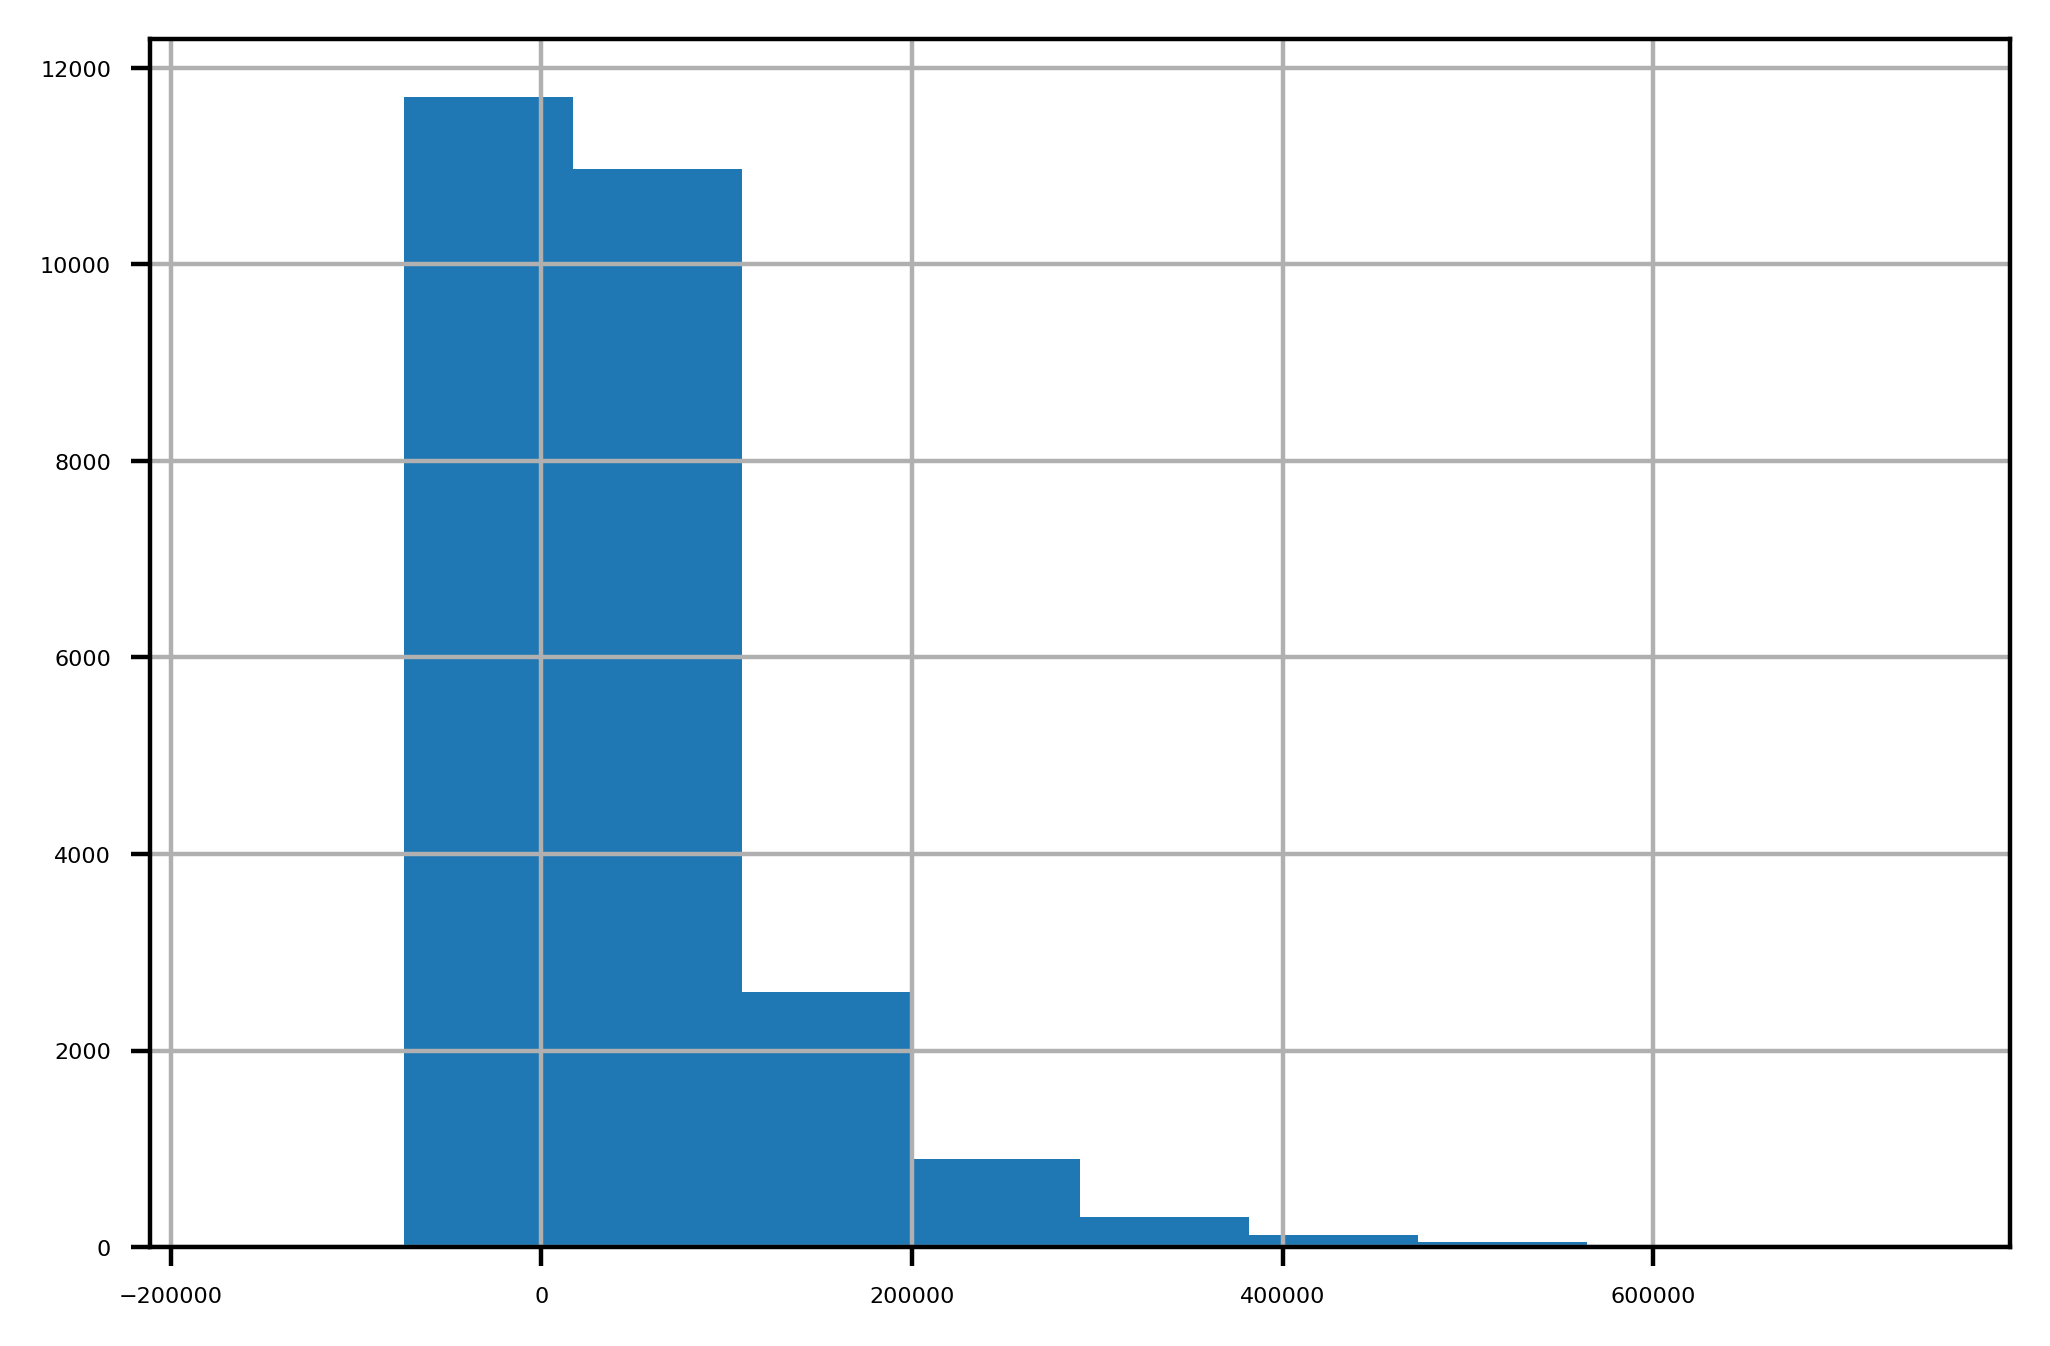

In [14]:
df[bill_feats[0]].hist()

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

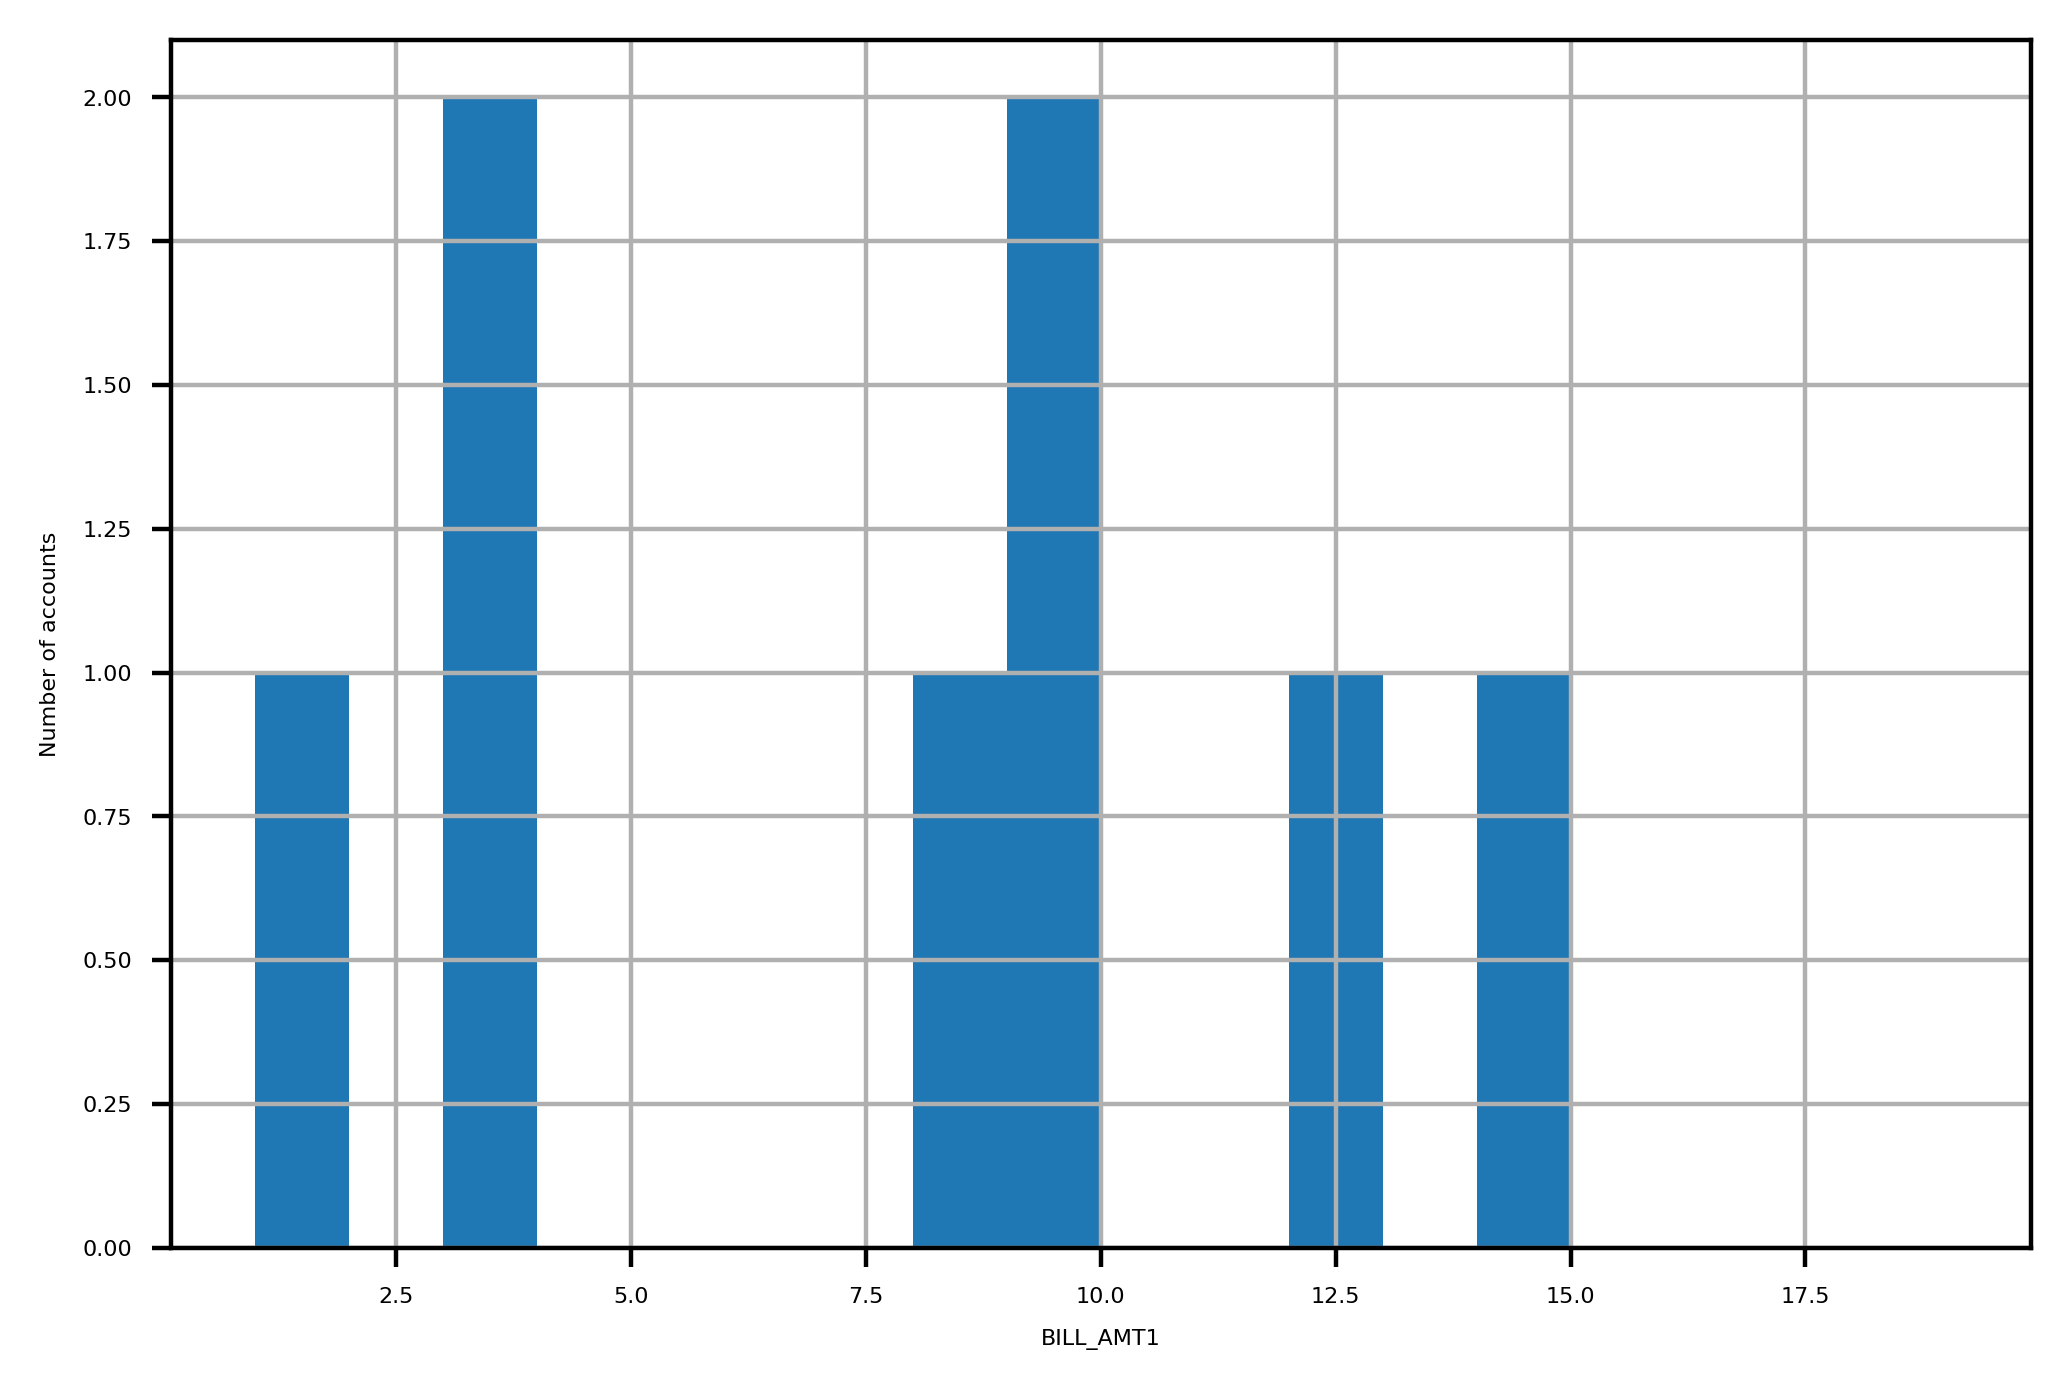

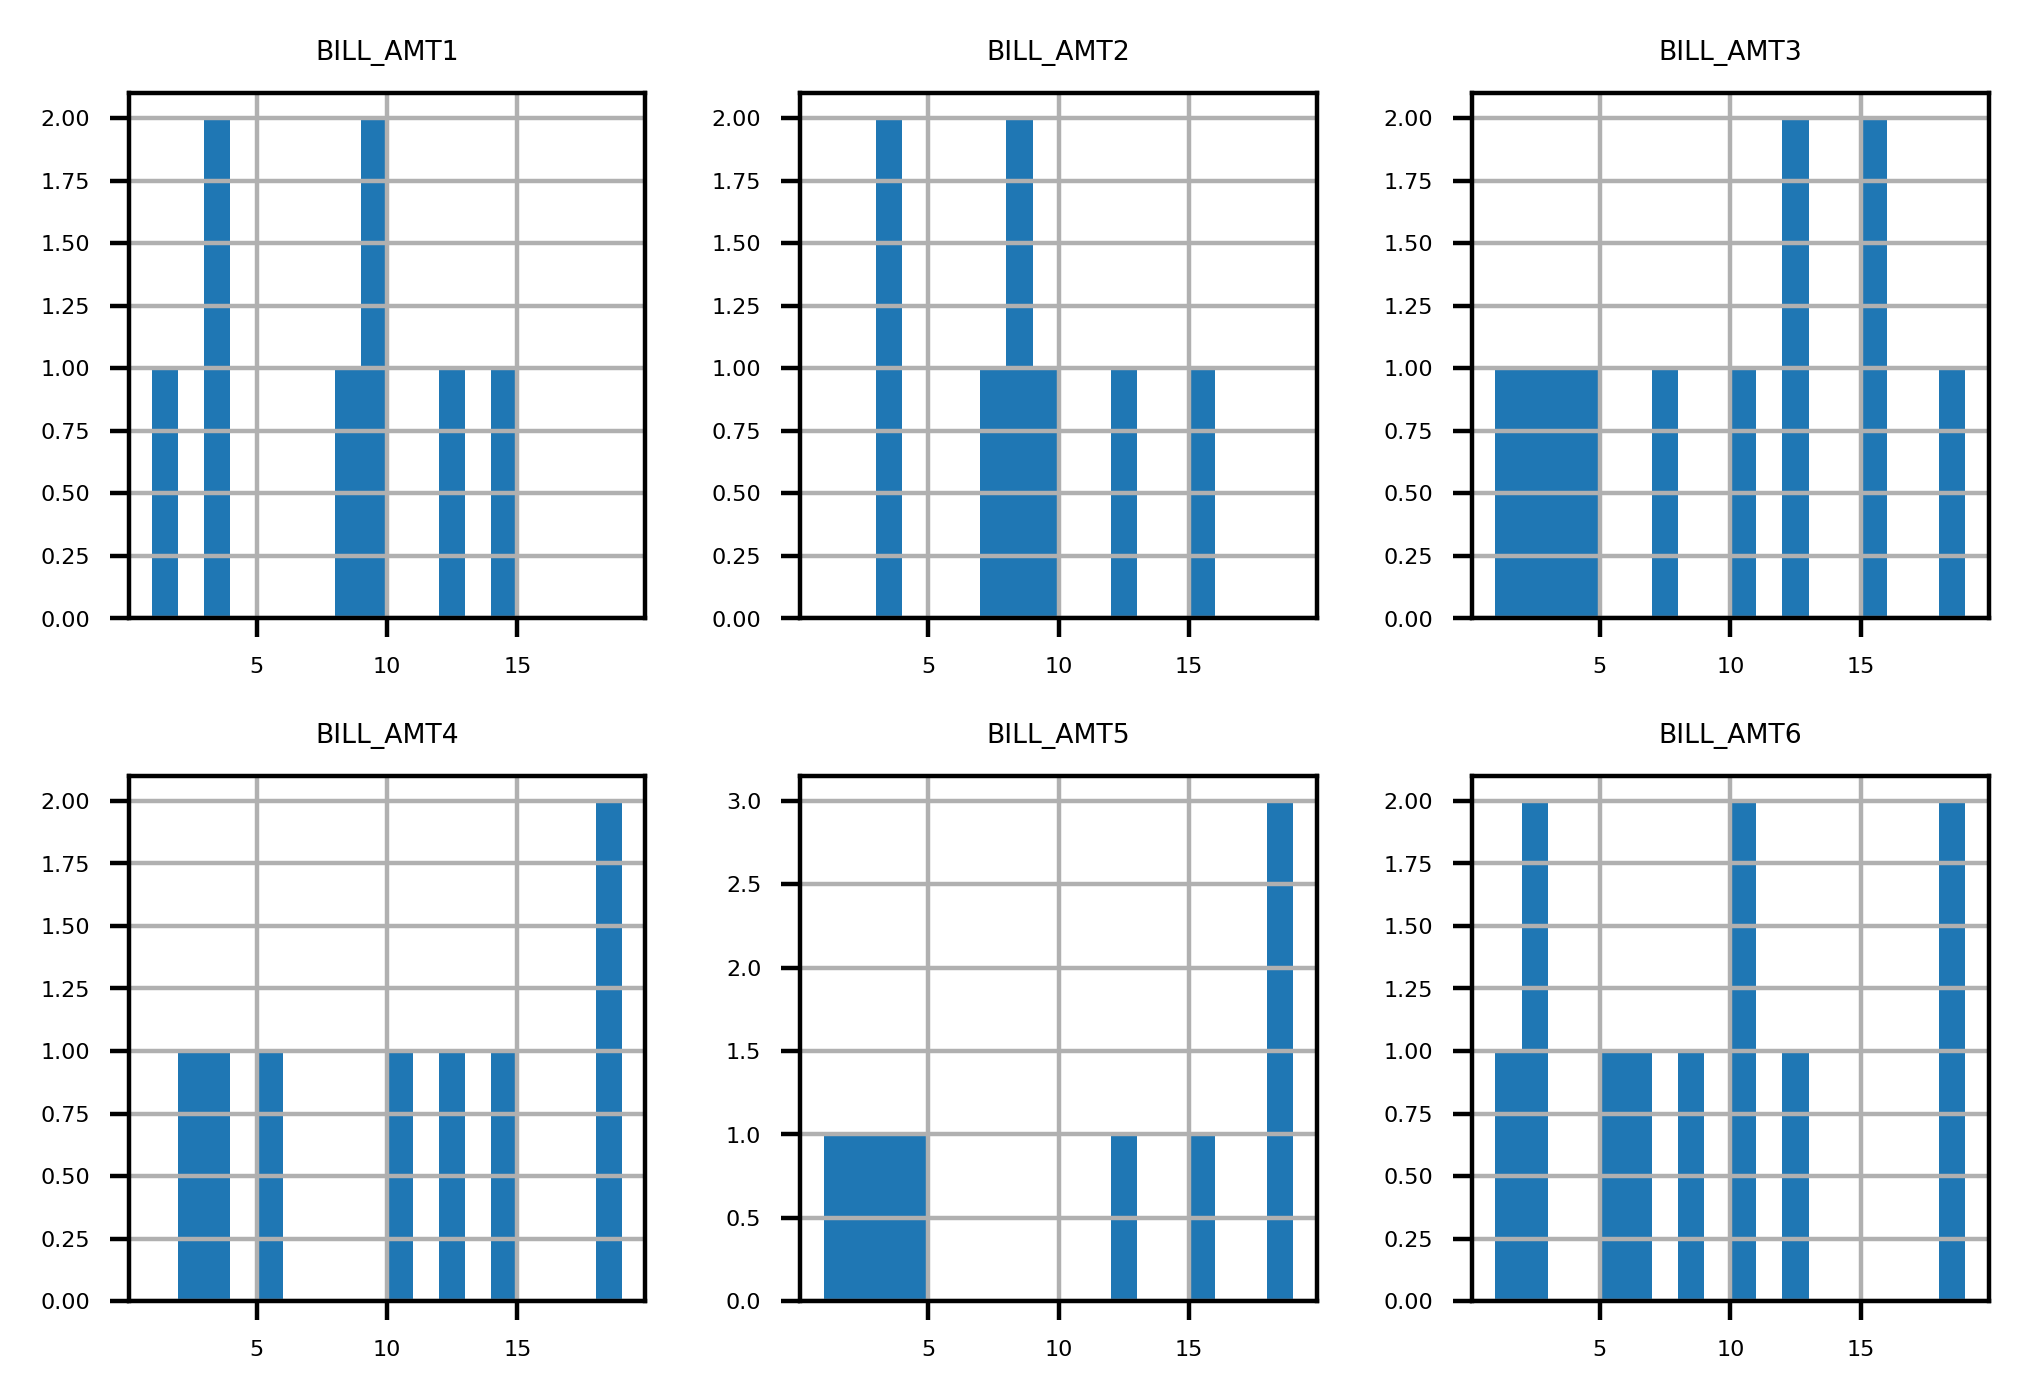

In [15]:
df[bill_feats[0]].hist(bins=BILL_AMT1_bins)
plt.xlabel('BILL_AMT1')
plt.ylabel('Number of accounts')


mpl.rcParams['font.size'] = 4
df[bill_feats].hist(bins=BILL_AMT1_bins, layout=(2,3))



________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [16]:
df[bill_feats].describe() 

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [17]:
df[pay_amt_feats[0]].value_counts().sort_index()

0         4656
1            8
2           13
3           15
4           16
          ... 
405016       1
423903       1
493358       1
505000       1
873552       1
Name: PAY_AMT1, Length: 7425, dtype: int64

    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


In [18]:
PAY_AMT1_bins = np.array(range(1,20))
PAY_AMT1_bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

Text(0, 0.5, 'Number of accounts')

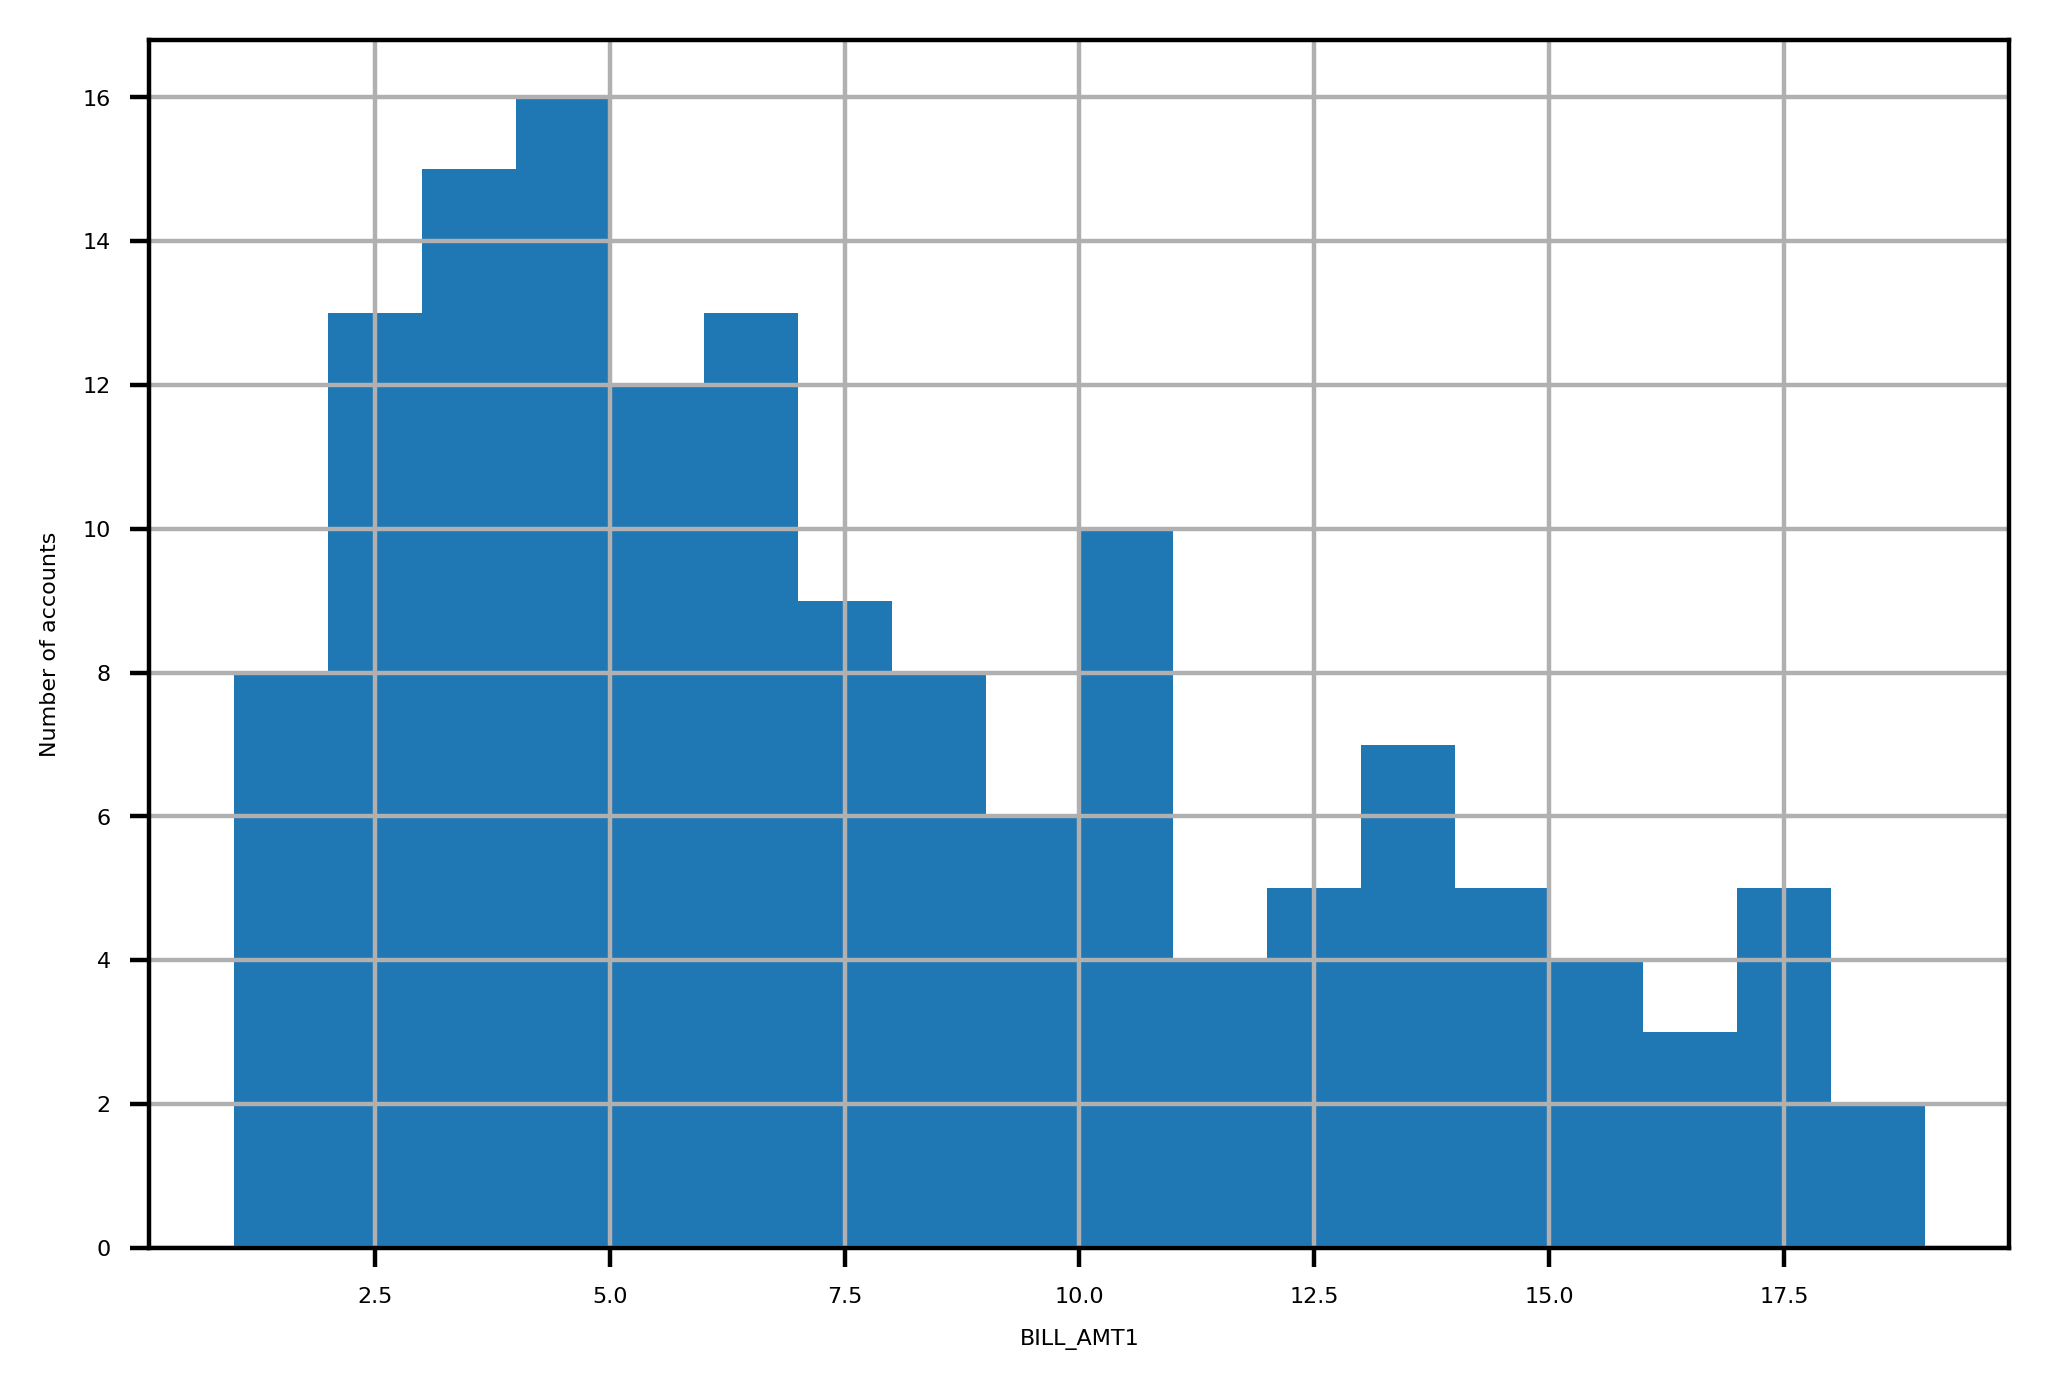

In [19]:
df[pay_amt_feats[0]].hist(bins=PAY_AMT1_bins)
plt.xlabel('BILL_AMT1')
plt.ylabel('Number of accounts')

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [20]:
pay_new_data = df.filter(like='PAY_AMT') 

In [21]:
pay_new_data.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [22]:
# Create Boolean mask
df_zero_mask = df == 0

In [23]:
# Use `.head()`
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,True,True,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,True,True,False
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,True,True,True,False


In [24]:
df_zero_mask.sum()

ID                                0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_1                         13087
PAY_2                         13961
PAY_3                         13968
PAY_4                         14596
PAY_5                         15032
PAY_6                         14416
BILL_AMT1                      1795
BILL_AMT2                      2225
BILL_AMT3                      2568
BILL_AMT4                      2861
BILL_AMT5                      3121
BILL_AMT6                      3586
PAY_AMT1                       4656
PAY_AMT2                       4833
PAY_AMT3                       5293
PAY_AMT4                       5697
PAY_AMT5                       5981
PAY_AMT6                       6373
default payment next month    20750
EDUCATION_CAT                     0
graduate school               17252
high school                 

In [55]:
feature_zero_mask = df_zero_mask.iloc[:,[18,19,20,21,22,23]].all(axis=1) 

In [56]:
feature_zero_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [57]:
sum(feature_zero_mask)

1278

In [38]:
df_clean_7 = df.loc[~feature_zero_mask,:].copy()

In [43]:
df.sum()

ID                            798fc410-45c18a8c8f3b-8eb485698822-43f50737c11...
LIMIT_BAL                                                            4477393680
SEX                                                                       42744
EDUCATION                                                                 49124
MARRIAGE                                                                  41490
AGE                                                                      946711
PAY_1                                                                      -474
PAY_2                                                                     -3556
PAY_3                                                                     -4471
PAY_4                                                                     -6000
PAY_5                                                                     -7193
PAY_6                                                                     -7828
BILL_AMT1                               

In [44]:
df_clean_7.sum()

ID                            798fc410-45c18a8c8f3b-8eb485698822-43f50737c11...
LIMIT_BAL                                                            4238853680
SEX                                                                       40689
EDUCATION                                                                 46904
MARRIAGE                                                                  39562
AGE                                                                      900312
PAY_1                                                                      -609
PAY_2                                                                     -2269
PAY_3                                                                     -2869
PAY_4                                                                     -4380
PAY_5                                                                     -5537
PAY_6                                                                     -6131
BILL_AMT1                               

In [40]:
df_clean_7.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [42]:
# Use `.sum()`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

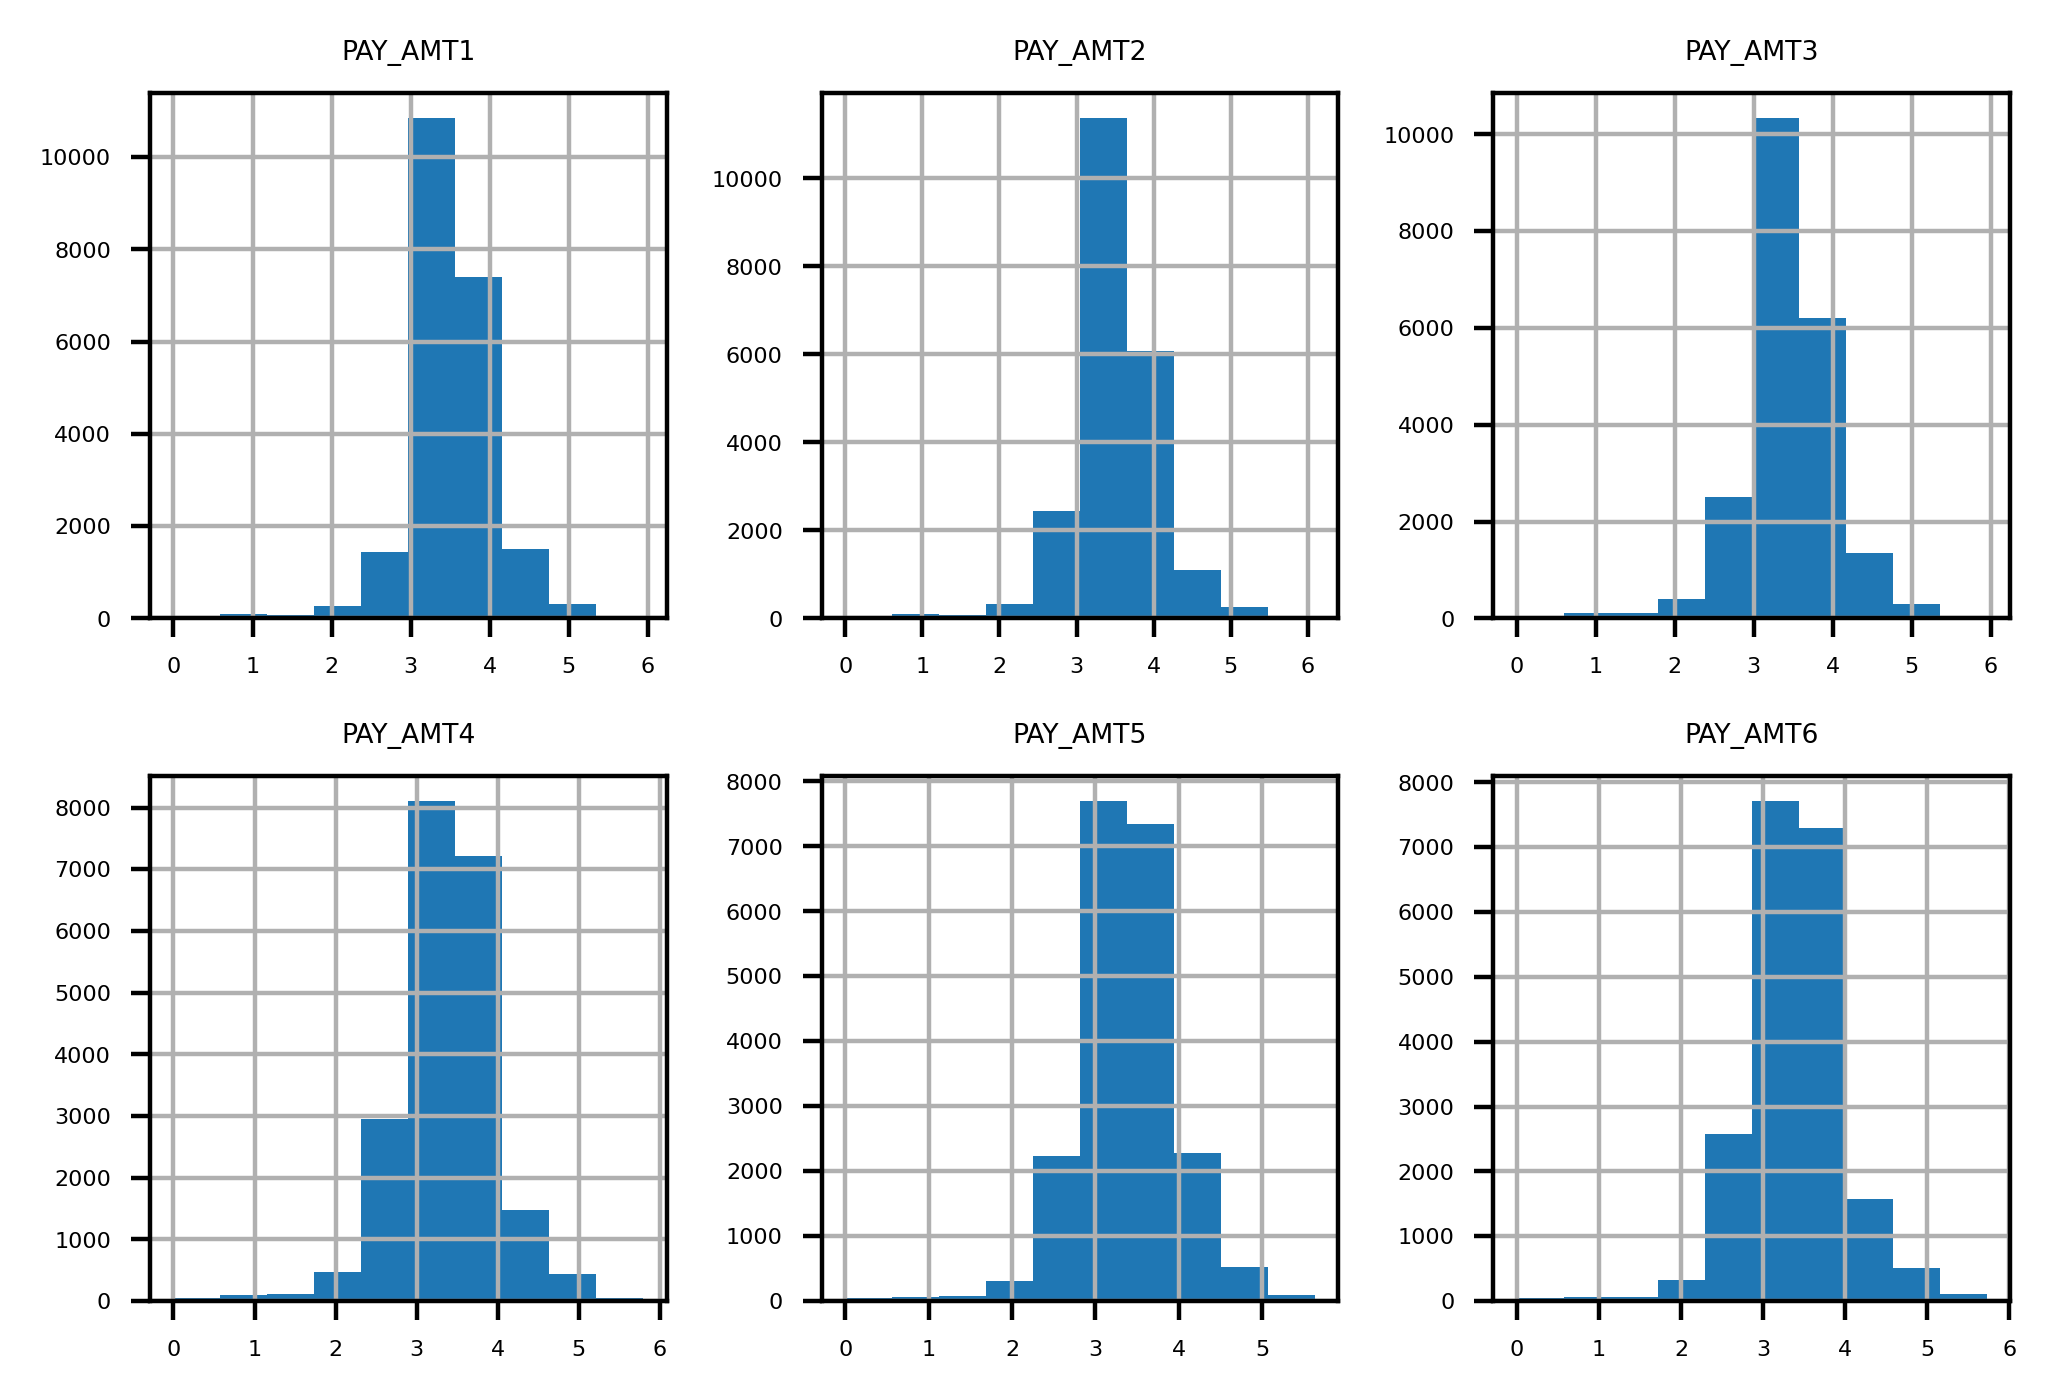

In [61]:
df[pay_amt_feats][~df_zero_mask].apply(np.log10).hist(layout=(2,3))